The script follows general guidelines from the Scanpy's [Trajectory inference for hematopoiesis in mouse](https://scanpy.readthedocs.io/en/stable/tutorials/trajectories/paga-paul15.html) tutorial.

For tajectory analysis, I will focus only on the epithelial cells, because they showed the most interesting cycle-related patterns in `expression.ipynb`.

In [18]:
import scanpy as sc
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
sc.settings.set_figure_params(dpi=100, facecolor="white")

In [14]:
data_file = Path('../data/endometrium_pc.h5ad')
data = sc.read_h5ad(data_file)
data.X = data.X.astype('float64')
data = data[data.obs['Broad cell type'] == 'Epithelial'] 

menstrual_cycle= ['proliferative', 'early-secretory', 'early-mid-secretory', 'mid-secretory', 'late-secretory']
data.obs['Stage ordered'] = pd.Categorical(
    values=data.obs.Stage, categories=menstrual_cycle, ordered=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_4476\3025943394.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs['Stage ordered'] = pd.Categorical(


# Nearest neighbors graph

In [5]:
sc.pp.neighbors(data,
                n_pcs=20,
                n_neighbors=100,
                method='umap',
                random_state=123)

c:\Users\maria\Desktop\dev\mcbs\msb\project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Clustering

In [6]:
sc.tl.leiden(data,
             resolution=0.2,
             random_state=123)

C:\Users\maria\AppData\Local\Temp\ipykernel_4476\501334699.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data,


# PAGA
Partition-based Graph Abstraction - shows how similar the clusters are to each other.

In [7]:
sc.tl.paga(data, groups='leiden')

### PAGA plot with TENT5A expression

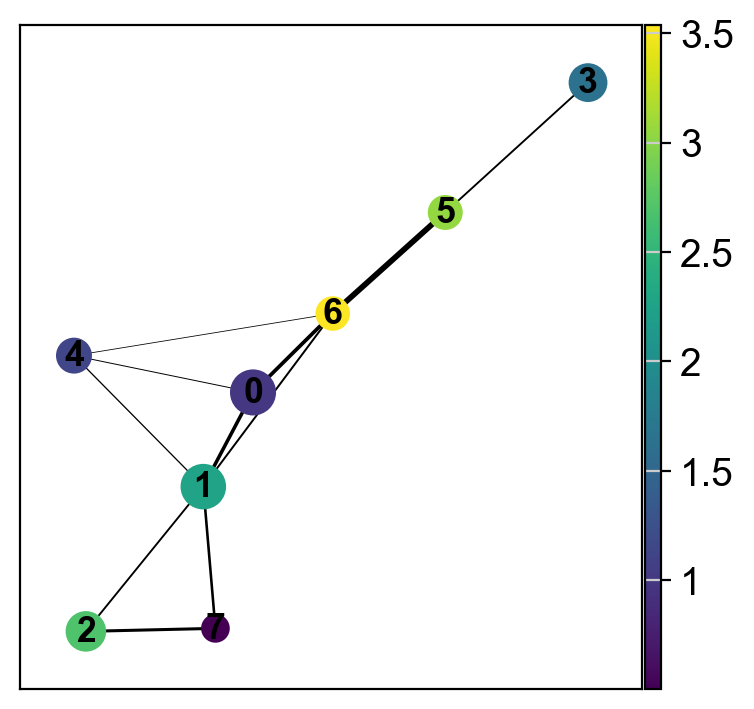

In [8]:
sc.pl.paga(data,
           color='FAM46A',
           random_state=123,
           threshold=0.03)

## UMAP

In [9]:
sc.tl.umap(data,
           random_state=123,
           init_pos='paga')

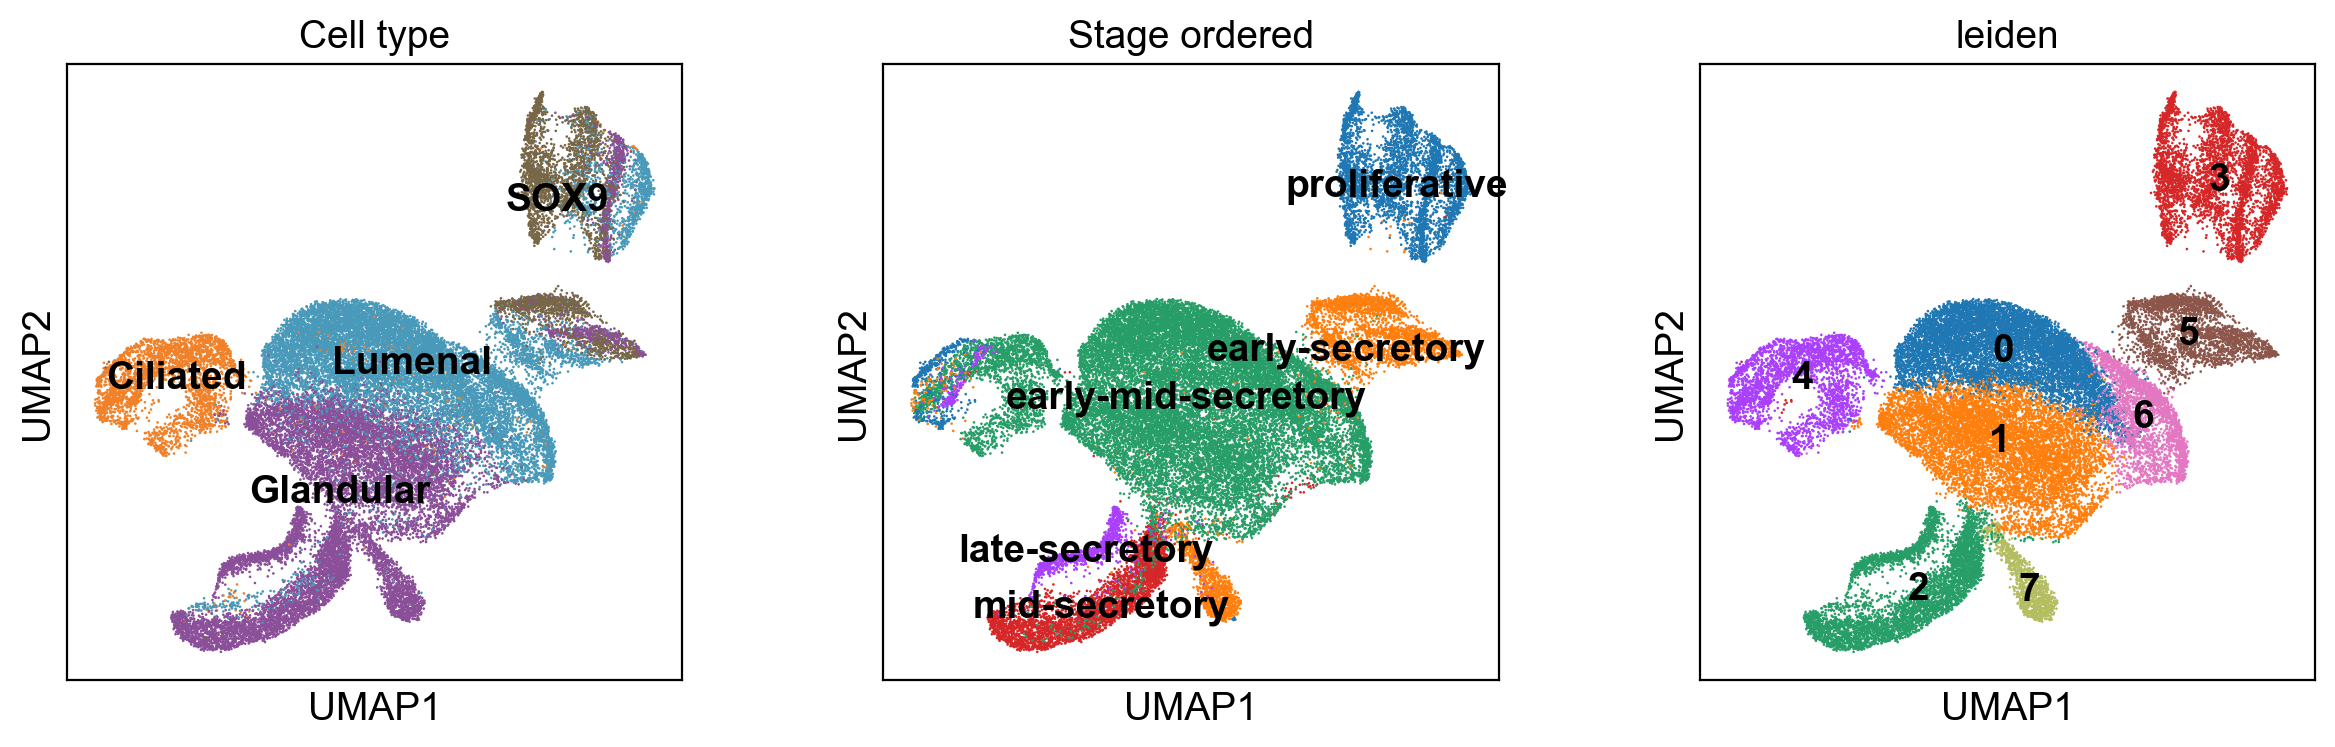

In [10]:
sc.pl.umap(data,
           color=['Cell type', 'Stage ordered', 'leiden'],
           legend_loc='on data')

## SOX9 cells 

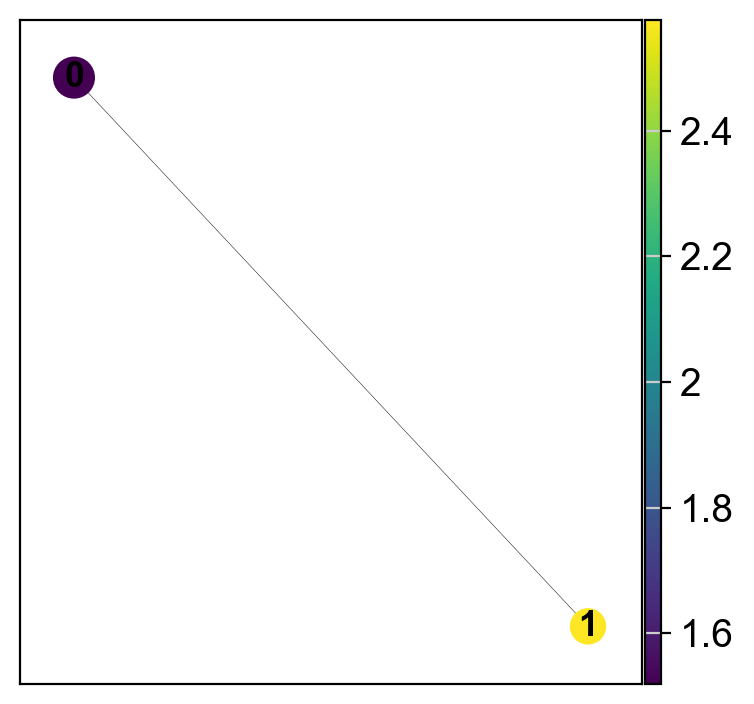

In [15]:
sox = data[data.obs['Cell type'] == 'SOX9']
sc.pp.neighbors(sox,
                n_pcs=20,
                n_neighbors=100,
                method='umap',
                random_state=123)
sc.tl.leiden(sox,
             resolution=0.05,
             random_state=123)
sc.tl.paga(sox,
           groups='leiden')
sc.pl.paga(sox,
           color='FAM46A',
           random_state=123)

In [16]:
sc.tl.umap(sox,
           init_pos='paga',
           random_state=123)

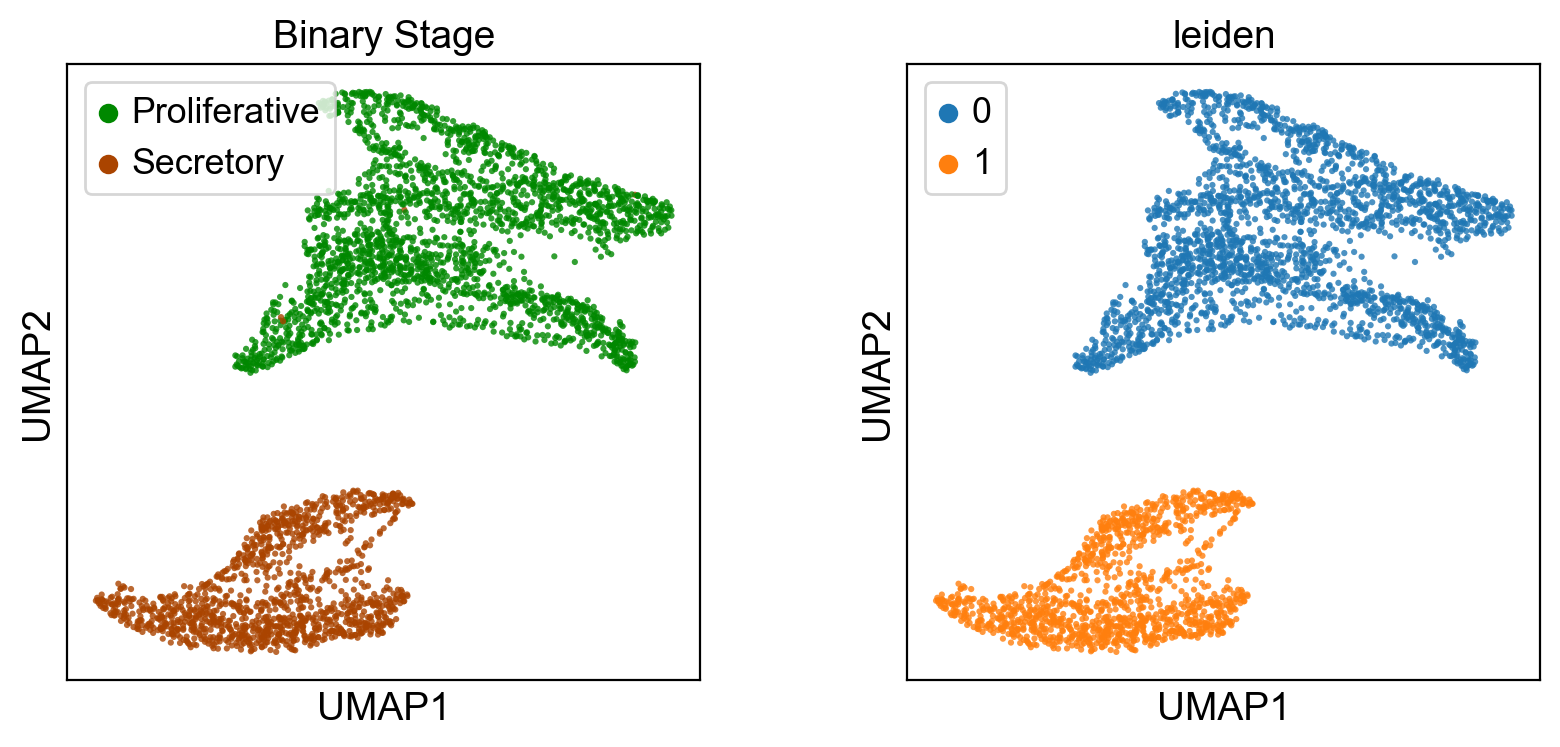

In [17]:
sc.pl.umap(sox,
           color=['Binary Stage', 'leiden'],
           legend_loc='upper left',
           size=20,
           alpha=0.8,
           use_raw=False)

### Diffusion pseudotime

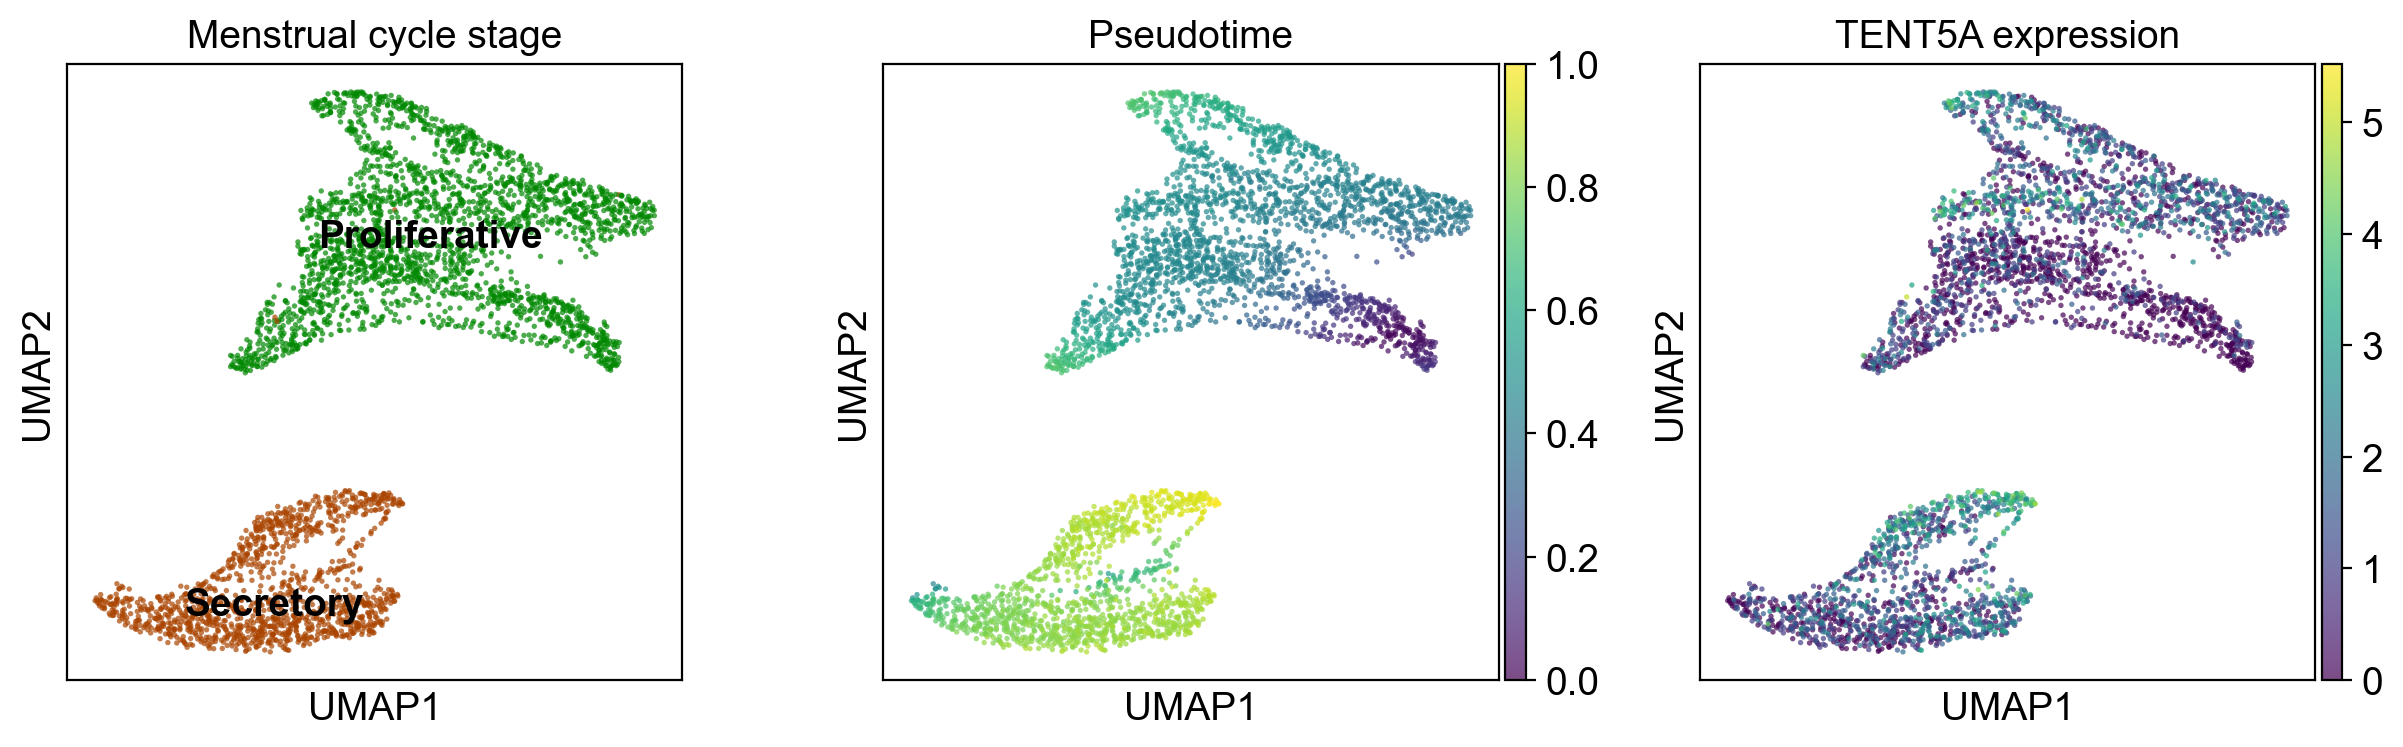

In [24]:
sc.tl.diffmap(sox,
              random_state=123)
sox.uns['iroot'] = np.flatnonzero(sox.obs['leiden'] == '0')[0]
sc.tl.dpt(sox)
sc.pl.umap(sox,
           color=['Binary Stage', 'dpt_pseudotime', 'FAM46A'],
           legend_loc='on data',
           use_raw=False,
           size=15,
           alpha=0.7,
           title=['Menstrual cycle stage', 'Pseudotime','TENT5A expression'],
           save='_pseudotime_sox.png')

## Glandular cells 

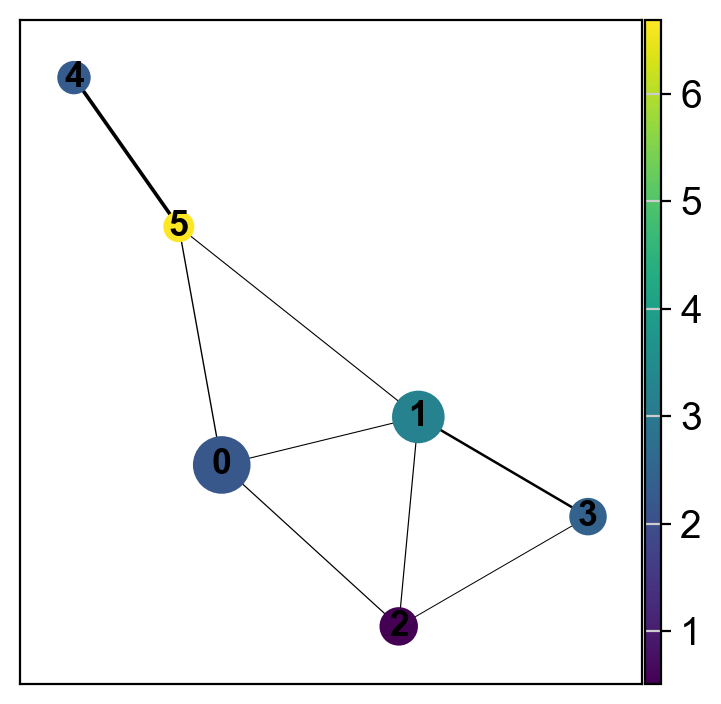

In [25]:
glandular = data[data.obs['Cell type'] == 'Glandular']
sc.pp.neighbors(glandular,
                n_pcs=20,
                n_neighbors=100,
                random_state=123)
sc.tl.leiden(glandular,
             random_state=123,
             resolution=0.1)
sc.tl.paga(glandular,
           groups='leiden')
sc.pl.paga(glandular,
           color='FAM46A',
           random_state=123,
           threshold=0.03)

In [26]:
sc.tl.umap(glandular,
           init_pos='paga',
           random_state=123)

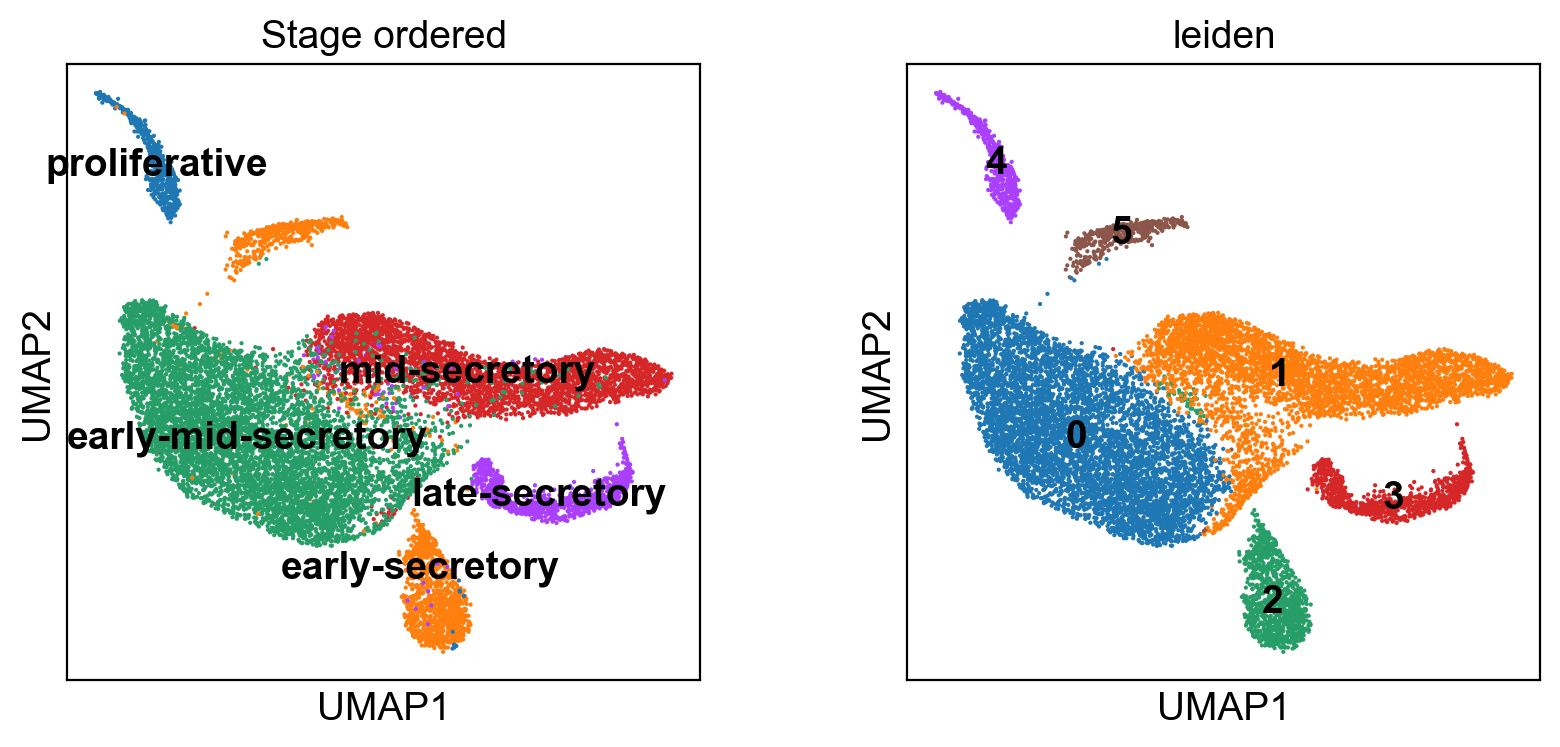

In [27]:
sc.pl.umap(glandular,
           color=['Stage ordered', 'leiden'],
           legend_loc='on data')

I picked the 4 cluster (proliferative) as a root as proliferative phase is the beginning.

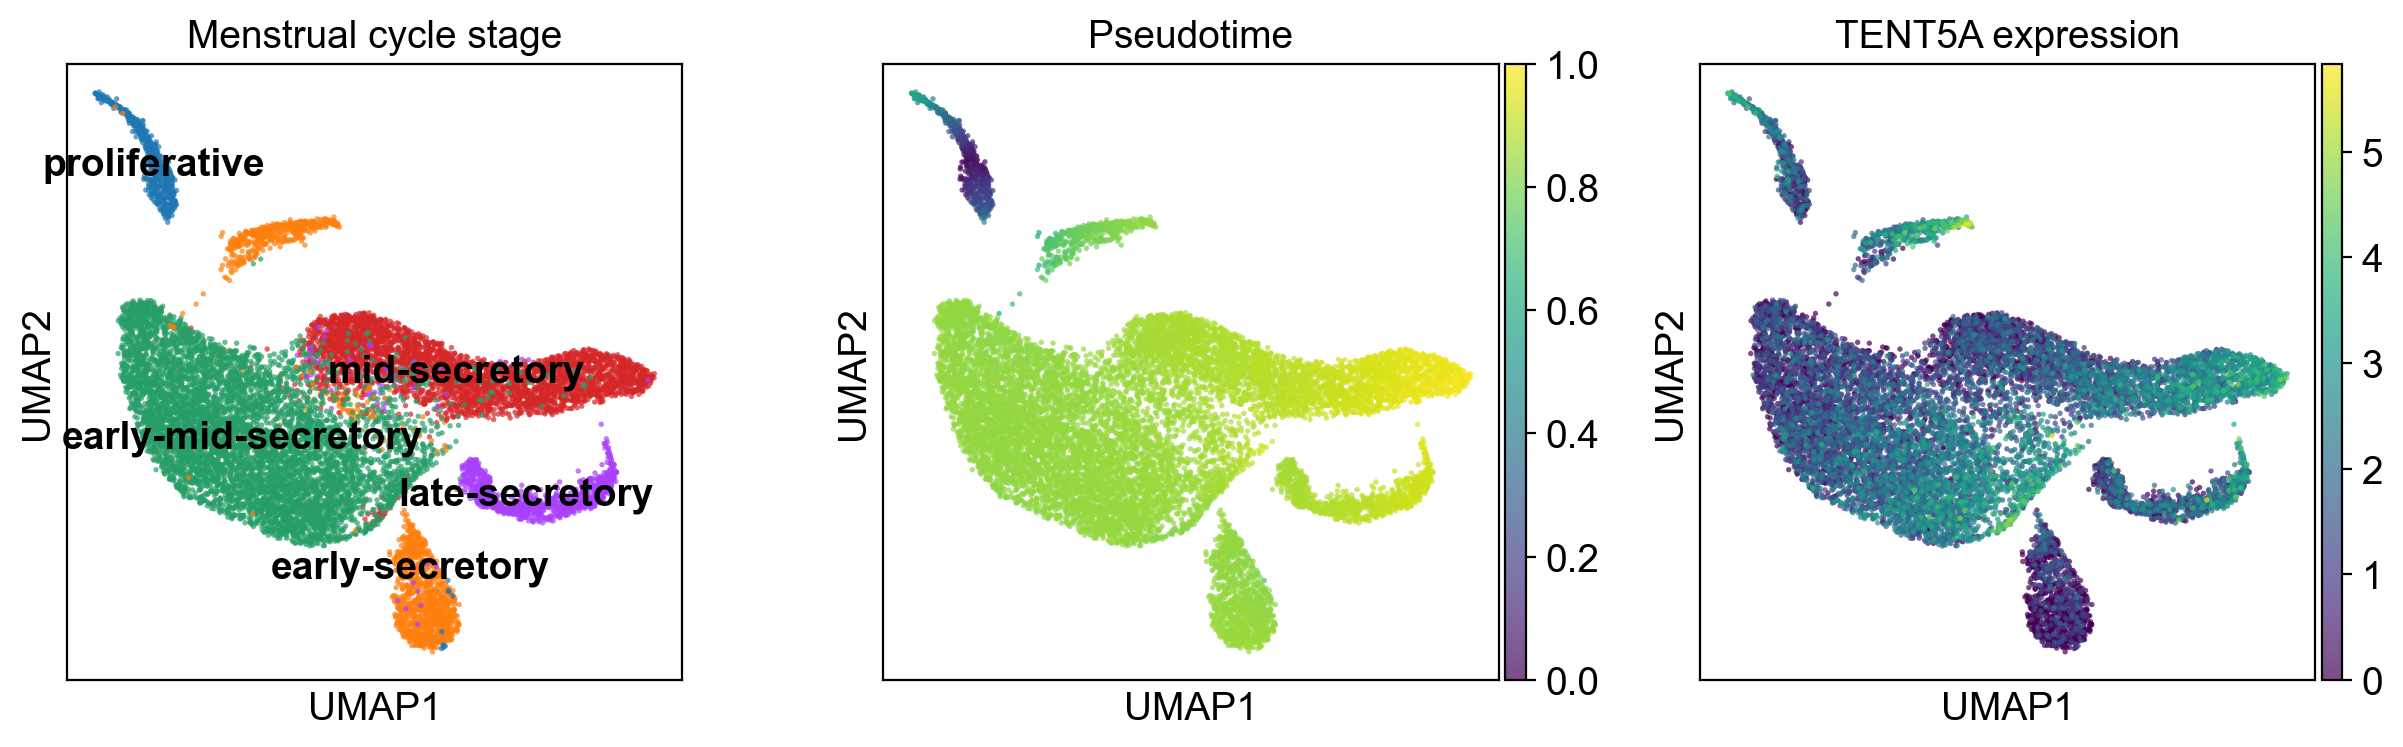

In [28]:
sc.tl.diffmap(glandular,
              random_state=123)
glandular.uns['iroot'] = np.flatnonzero(glandular.obs['leiden'] == '4')[0]
sc.tl.dpt(glandular)
sc.pl.umap(glandular,
           color=['Stage ordered', 'dpt_pseudotime', 'FAM46A'],
           legend_loc='on data',
           use_raw=False,
           size=15,
           alpha=0.7,
           title=['Menstrual cycle stage', 'Pseudotime','TENT5A expression'],
           save='_pseudotime_glandular.png')